# 1. Visualize Activation Maps: Description: Visualize activation maps to understand which image regions activate CNN filters for emotion detection. Guidelines: You can use any of your pre trained model (made by you) for this task. GUI is not necessary for this task.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# 1. Dataset Paths
train_dir = r"C:\Users\sreel\OneDrive\Desktop\Internship\train"
test_dir = r"C:\Users\sreel\OneDrive\Desktop\Internship\test"


In [3]:
# 2. Image and Batch Size
IMG_SIZE = 48
BATCH_SIZE = 32


In [4]:
# 3. Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE, color_mode="grayscale",
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE, IMG_SIZE),
                                                  batch_size=BATCH_SIZE, color_mode="grayscale",
                                                  class_mode="categorical", shuffle=True)

# Get number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Number of classes: 7


In [5]:
# 4. CNN Model Definition (Functional API)

def create_functional_model():
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1))
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
    x = layers.MaxPooling2D(2, 2)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="Emotion_CNN")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
# 5. Build and Train the Model
model = create_functional_model()
model.summary()

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

# 6. Save the Model
model.save("fer2013_emotion_cnn_functional.h5")
print("Model saved successfully!")


Model: "Emotion_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,375 (4.86 MB)

 Trainable params: 1,274,375 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Users\sreel\anaconda3_\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 772s 850ms/step - accuracy: 0.2406 - loss: 1.8176 - val_accuracy: 0.2622 - val_loss: 1.7653
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 472s 526ms/step - accuracy: 0.2568 - loss: 1.7804 - val_accuracy: 0.3031 - val_loss: 1.6980
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 277s 306ms/step - accuracy: 0.2785 - loss: 1.7480 - val_accuracy: 0.3178 - val_loss: 1.6672
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 88s 98ms/step - accuracy: 0.2942 - loss: 1.7148 - val_accuracy: 0.3539 - val_loss: 1.6060
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 89s 98ms/step - accuracy: 0.3158 - loss: 1.6860 - val_accuracy: 0.4004 - val_loss: 1.5251


Model saved successfully!


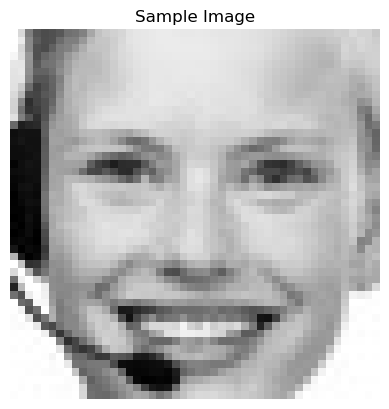

Available conv layers: ['conv1', 'conv2', 'conv3']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


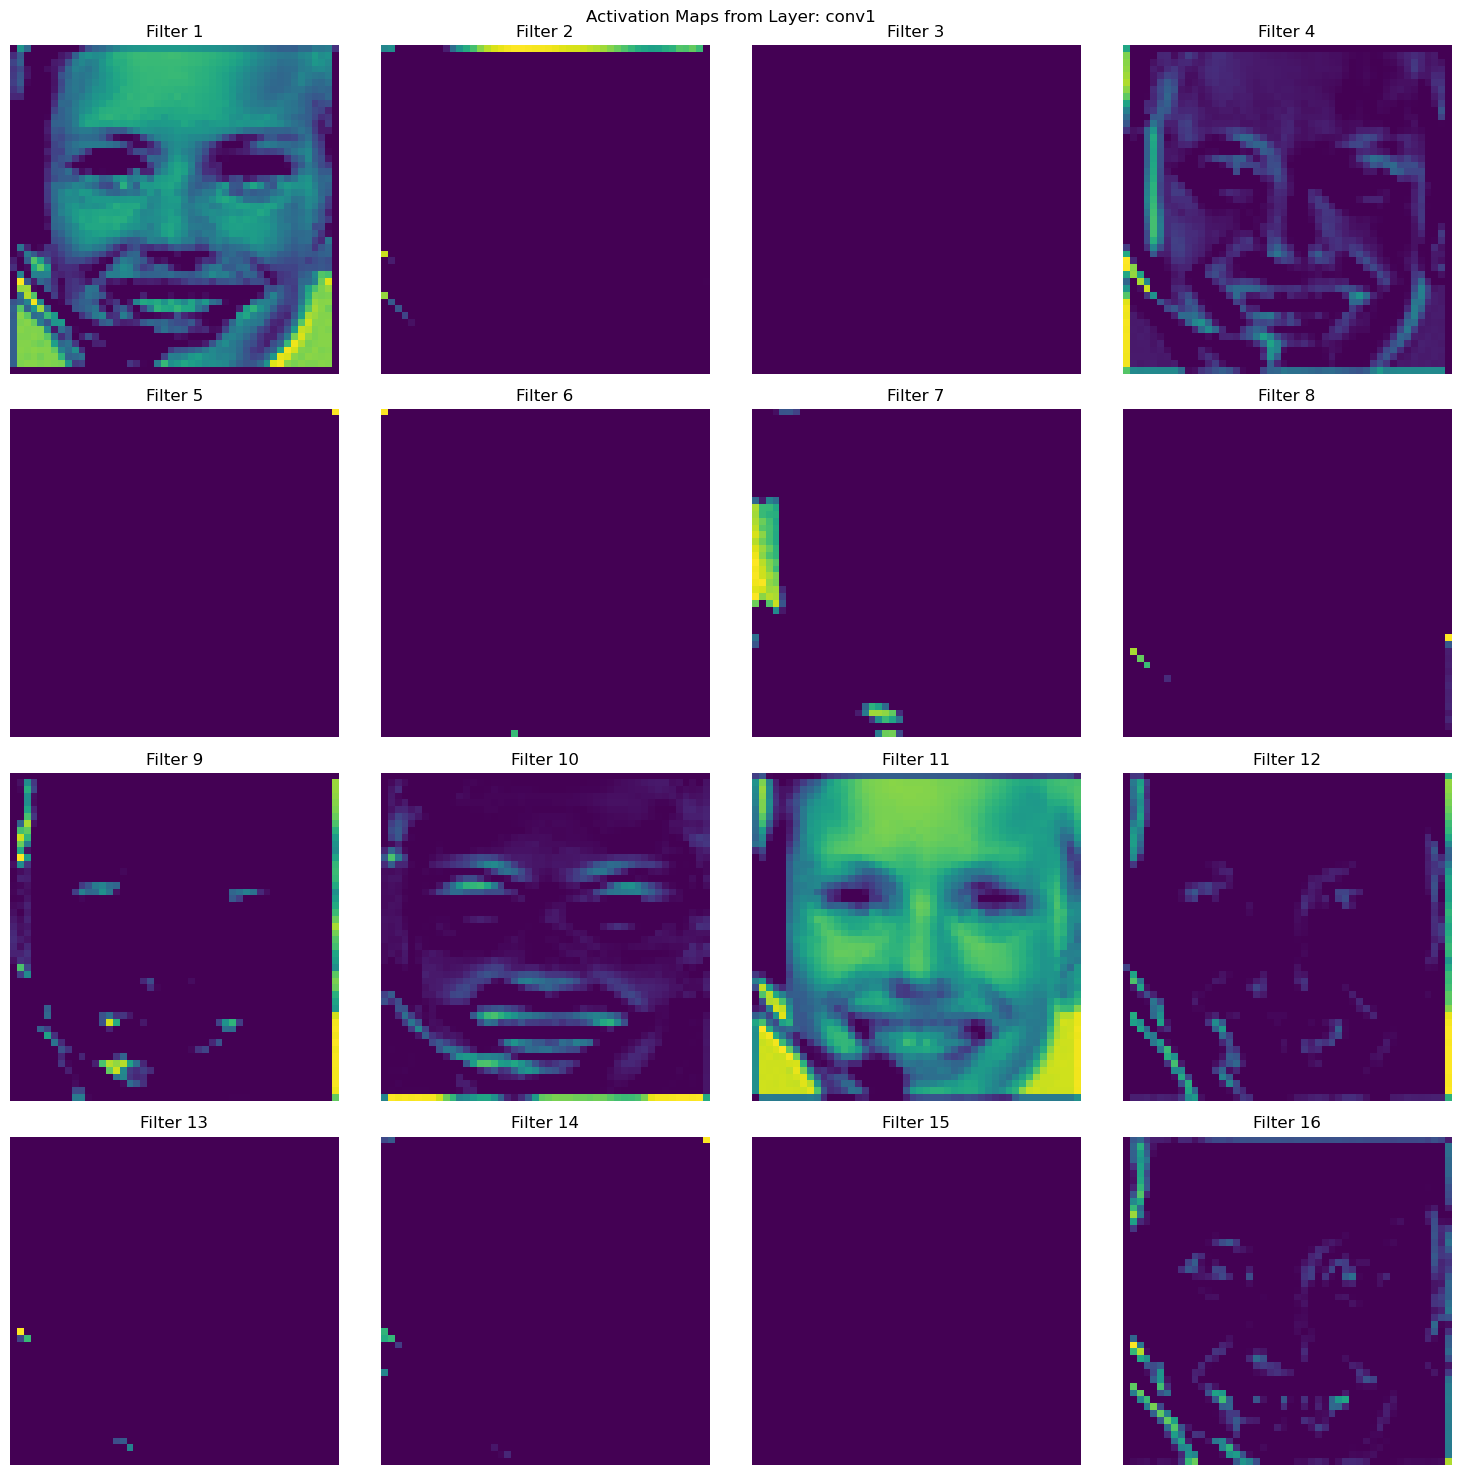

In [7]:
# 8. Visualize Activation Maps
# Load one image from test set
sample_images, sample_labels = next(test_generator)
sample_image = sample_images[12].reshape(1, IMG_SIZE, IMG_SIZE, 1)

# Show original image
plt.imshow(sample_image[0].squeeze(), cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

# Pick a convolutional layer to visualize
conv_layers = [layer.name for layer in model.layers if 'conv' in layer.name]
print("Available conv layers:", conv_layers)
layer_name = conv_layers[0]  # you can try 'conv1', 'conv2', 'conv3'

# Create activation model
activation_model = Model(inputs=model.input,
                         outputs=model.get_layer(layer_name).output)

activations = activation_model.predict(sample_image)

# Plot activation maps
num_filters = activations.shape[-1]
plt.figure(figsize=(15, 15))
for i in range(min(num_filters, 16)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
    ax.set_title(f'Filter {i+1}')
plt.suptitle(f'Activation Maps from Layer: {layer_name}')
plt.tight_layout()
plt.show()
